# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [5]:
#Hago un dtypes y un shape para ver que tal son los datos y la cantidad de filas y columnas.

In [6]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
dtype: object

In [7]:
df.shape

(1010, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [9]:
df['id_student'] = df['id_student'].astype(int)

In [10]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
dtype: object

### 2. Explore the columns that are objects (string)

In [11]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: count, dtype: int64

In [12]:
df['lunch'].value_counts()

lunch
standard        659
free/reduced    351
Name: count, dtype: int64

In [13]:
df['gender'].value_counts()

gender
male      373
female    337
FEMALE    103
MALE       97
Male       54
Female     46
Name: count, dtype: int64

In [14]:
#Escrito de diferentes maneras Female and Male, tenemos que arreglarlo. 

In [15]:
df['test preparation course'].value_counts()

test preparation course
none         672
completed    338
Name: count, dtype: int64

In [16]:
df['parental level of education'].value_counts()

parental level of education
some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: count, dtype: int64

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [17]:
#Tenemos que unificar male y female, lo ponemos en misnuscula todo. 
df['gender'] = df['gender'].str.lower()


In [18]:
#Ahora toca comprobar que se ha cambiado y está unificado. 
df['gender'].value_counts()

gender
male      524
female    486
Name: count, dtype: int64

### 4. What may be happening with the year? 

In [19]:
#Hacemos un value counts para entender que tipo de variables hay en la columna Year. 
df['Year'].value_counts()

Year
2023    952
1990     58
Name: count, dtype: int64

In [20]:
#Como hemos comentado en clase, no tiene mucho sentido tener la columna de 1990 ya que el problema es actual. Entonces sacamos limpiamos los 58 que son de 1990. 

In [21]:
df = df[df['Year']!=1990]

### 5. Do we have any duplicates? 

In [22]:
#Para ver si tenemos duplicados hacemos un sum 

In [23]:
df.duplicated().sum()

10

In [24]:
#Hay 10 duplicados, toca limpiarlo. 

In [25]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### 6.1. Missing values: Remember the column address

In [26]:
#Miramos que tal está la columna adress
df['address']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
994   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: address, Length: 942, dtype: float64

In [27]:
#Al ser valores nulos hacemos un drop de la columna entera.

In [28]:
df = df.drop(columns='address')

In [29]:
#Comprobamos haciendo un df.head()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,some high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


### 6.2. What about the missing values of the column Age? 

In [30]:
#Primero tenemos que cuantificar cuantos nulos hay en la columna Age

In [31]:
df['Age'].isna().sum()

62

In [32]:
#Hago un value caunts para ver cuantos valores hay

In [33]:
df['Age'].value_counts()

Age
14.0    240
17.0    232
16.0    212
15.0    196
Name: count, dtype: int64

In [34]:
#Como se ha comentado en clase repartimos estos 62 valores a las 4 variables que tenemos así no tenemos nulos.

df.loc[df['Age'].isna(),'Age'] =  df.loc[df['Age'].isna(),'Age'].apply( lambda x: np.random.choice(range(14,17)) )

In [35]:
# Y ahora comprobamos. 
df['Age'].isna().sum()

0

### 7. What is going on with the math scores?

In [40]:
df['math score'].value_counts()

math score
63     30
71     28
77     28
74     28
58     26
       ..
23      1
120     1
29      1
34      1
25      1
Name: count, Length: 78, dtype: int64

In [44]:
#Vemos que hay valores que son más de 100, por lo que parece un error. Ya que los math scores van de 0-100

valores_mayores_de_100 = df[df['math score'] > 100]

In [45]:
#Numero de valores que pasan el 100
conteo_mayores_de_100 = valores_mayores_de_100['math score'].count()
print(f'Hay {conteo_mayores_de_100} valores mayores de 100.')

Hay 1 valores mayores de 100.


In [46]:
df[df['math score']>100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
11,female,group D,high school,standard,completed,120,87,100,1011,2023,16.0


In [47]:
df = df.loc[df['math score']<=100]

In [48]:
#ahora toca comprobar que no la fila 11 no está, hacemos un df[df['math score']>100]
df[df['math score']>100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age


## Do some initial plots? EDA

In [49]:
#Hacemos graficas de 'gender','lunch','race/ethnicity','parental level of education','test preparation course' para ver la distribución. 

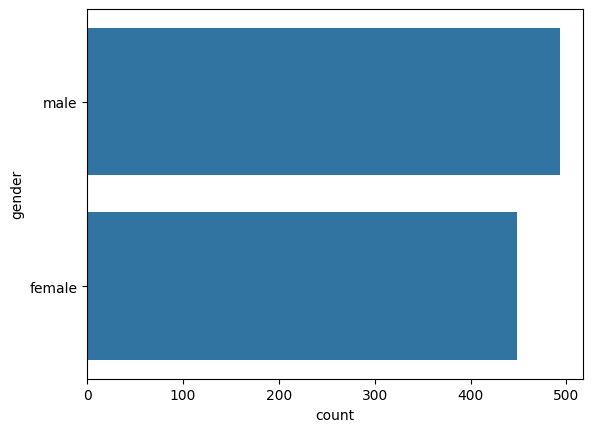

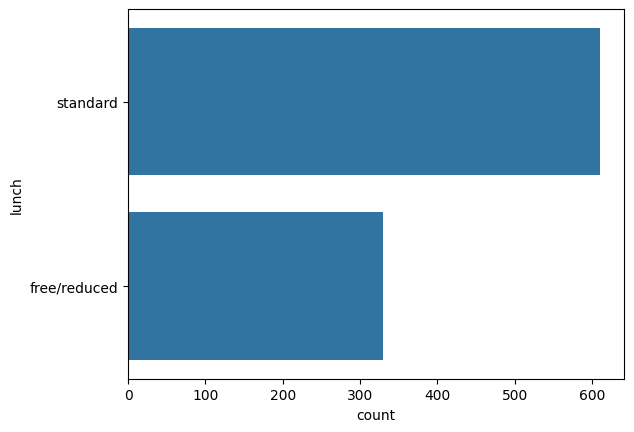

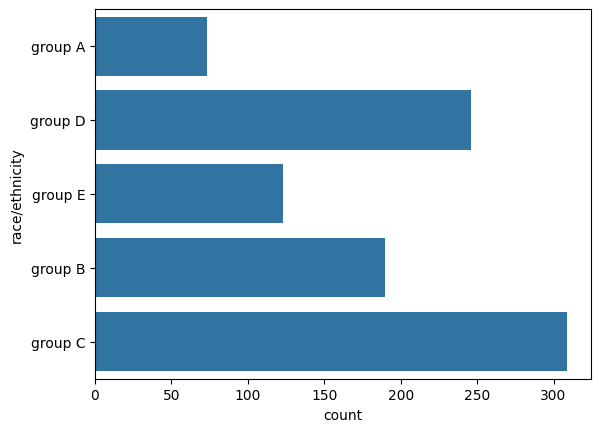

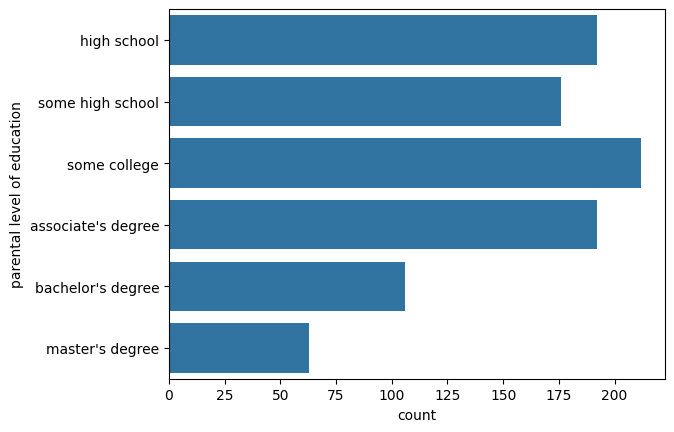

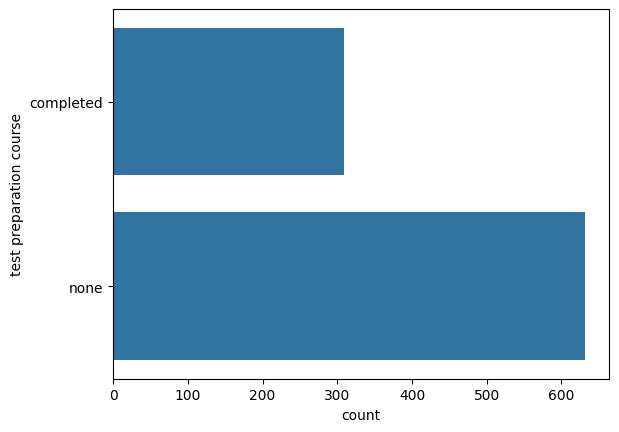

In [51]:
for columna in ['gender','lunch','race/ethnicity','parental level of education','test preparation course']:
    sns.countplot(data=df, y=columna)
    plt.show()

In [53]:
#Ahora miramos las diferentes notas que hay 'math score' 'reading score' y 'writing score'

<Axes: xlabel='math score', ylabel='Count'>

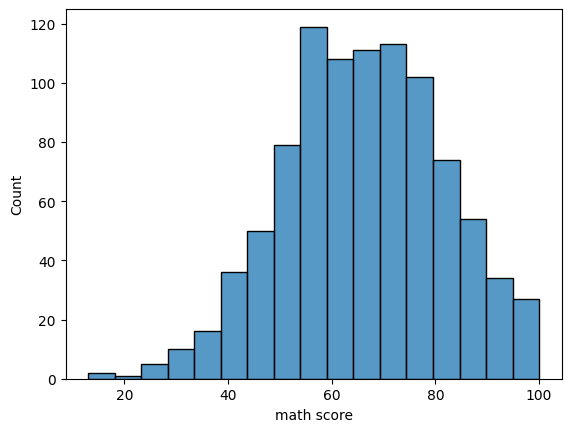

In [54]:
sns.histplot(data=df, x='math score', binwidth=5)

<Axes: xlabel='reading score', ylabel='Count'>

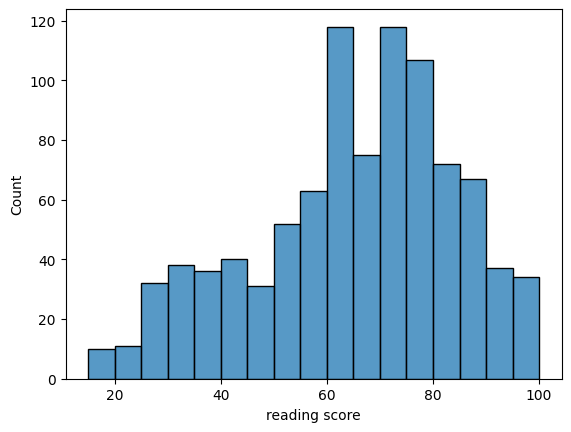

In [55]:
sns.histplot(data=df, x='reading score', binwidth=5)

<Axes: xlabel='writing score', ylabel='Count'>

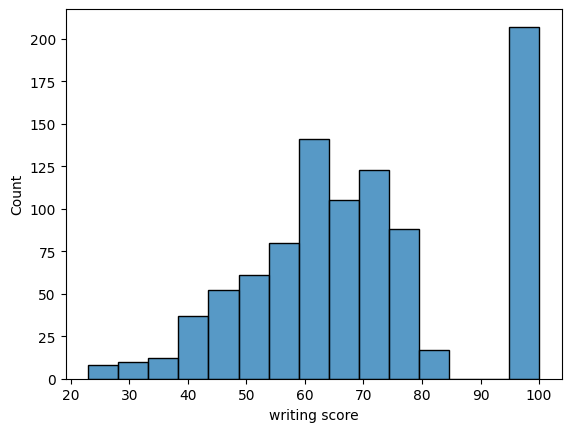

In [56]:
sns.histplot(data=df, x='writing score', binwidth=5)

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

In [57]:
#Entonces hacemos un drop de las dos columnas. 
df = df.drop(columns=['id_student','Year'])

In [58]:
#Comprobamos y vemos que está correcto. 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Age
0,male,group A,high school,standard,completed,67,67,63,14.0
1,female,group D,some high school,free/reduced,none,40,29,55,17.0
2,male,group E,some college,free/reduced,none,59,60,50,14.0
3,male,group B,high school,standard,none,77,78,68,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,16.0


#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



In [59]:
def grafico_long(df,variable_interes):
    aux = df.copy()
    aux = pd.melt(aux, id_vars=variable_interes, value_vars=['math score','writing score','reading score'])
    aux.columns=[variable_interes,'test','score']

    sns.catplot(data = aux, y=variable_interes, x='score',col='test' ,kind='box')
    return None

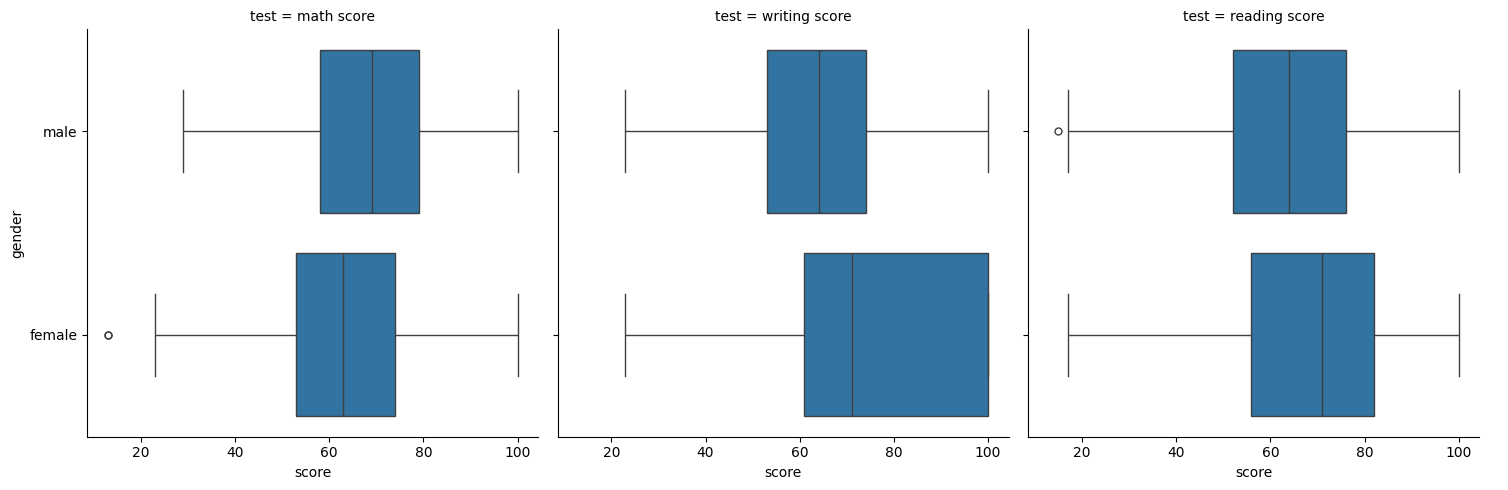

In [60]:
grafico_long(df,'gender')
#Vemos una desviación en writing score y female.

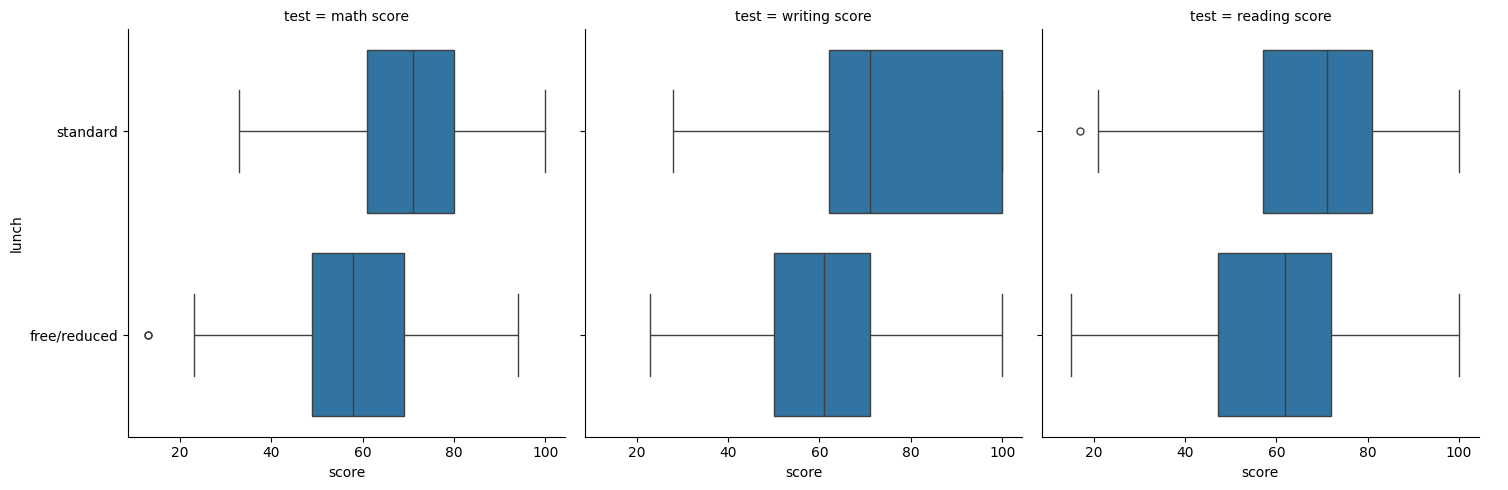

In [61]:
grafico_long(df,'lunch')
#con el tema lunch hay una notoria desviación con la standar y writing score. 

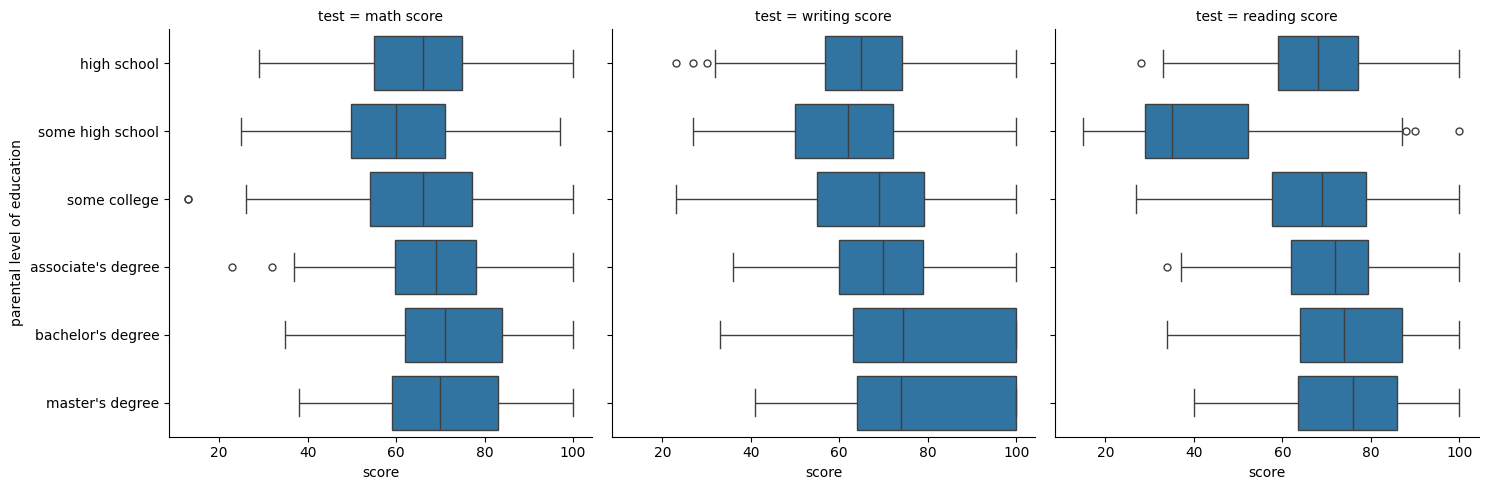

In [62]:
grafico_long(df,'parental level of education')


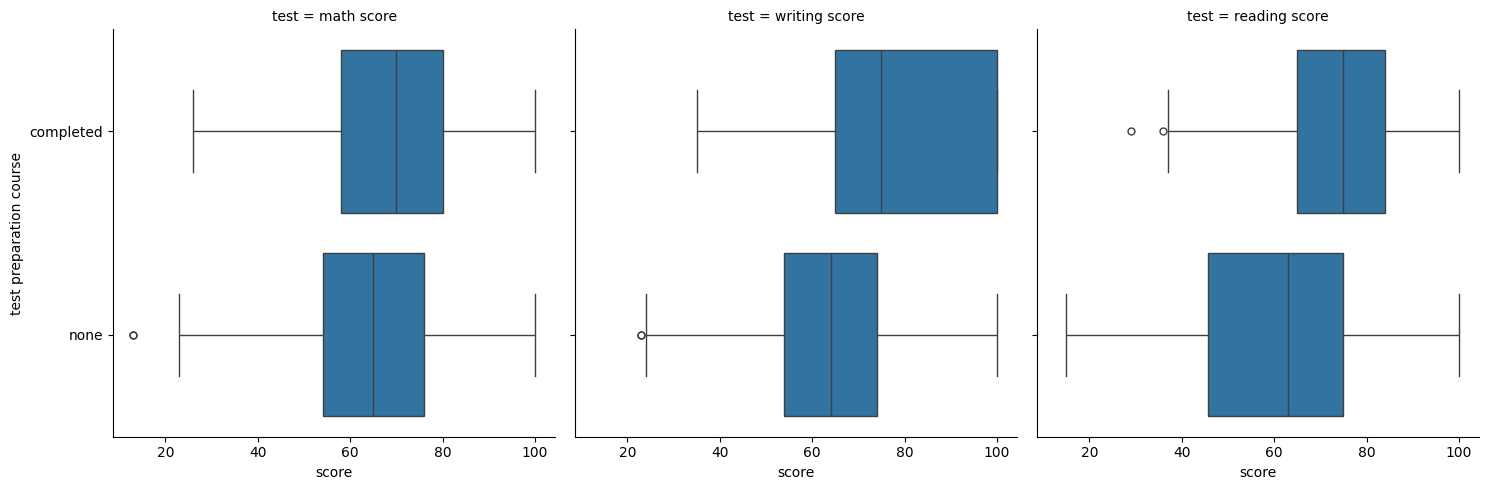

In [63]:
grafico_long(df,'test preparation course')


### 2-variable Analysis with Lunch column 

In [64]:
def grafico_long_bi(df,variable_interes_1,variable_interes_2):
    aux = df.copy()
    aux = pd.melt(aux, id_vars=[variable_interes_1,variable_interes_2], value_vars=['math score','writing score','reading score'])
    aux.columns=[variable_interes_1,variable_interes_2,'test','score']

    sns.catplot(data = aux, y=variable_interes_1, x='score',col='test' ,kind='box', hue=variable_interes_2)
    return None

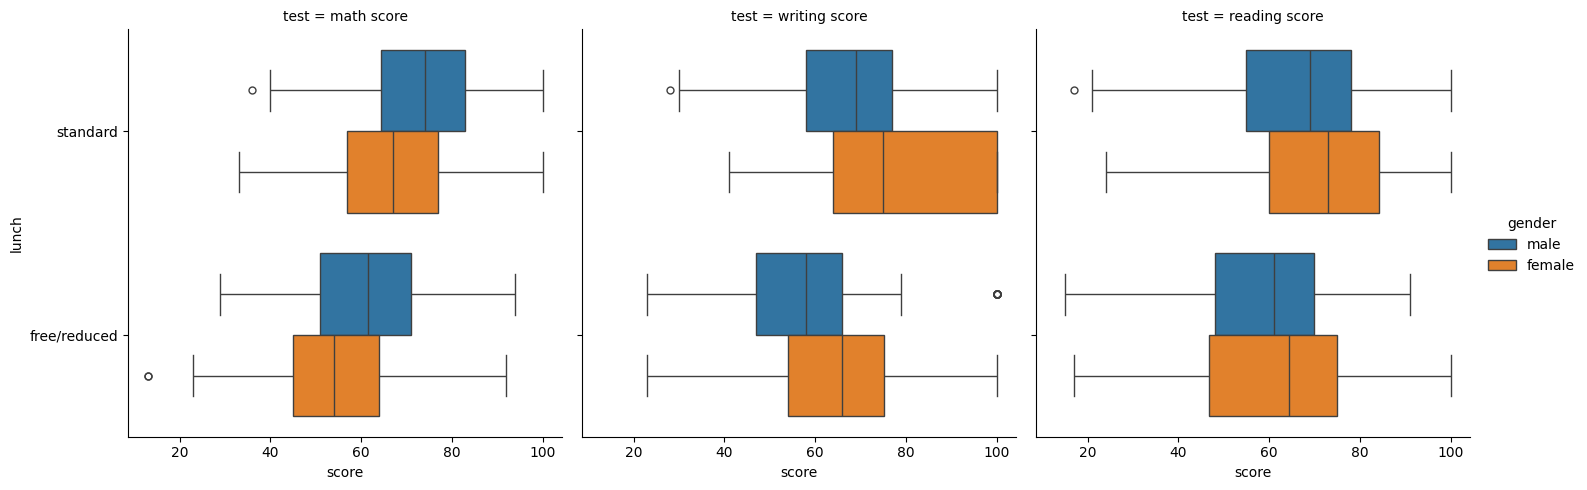

In [65]:
grafico_long_bi(df,'lunch','gender')

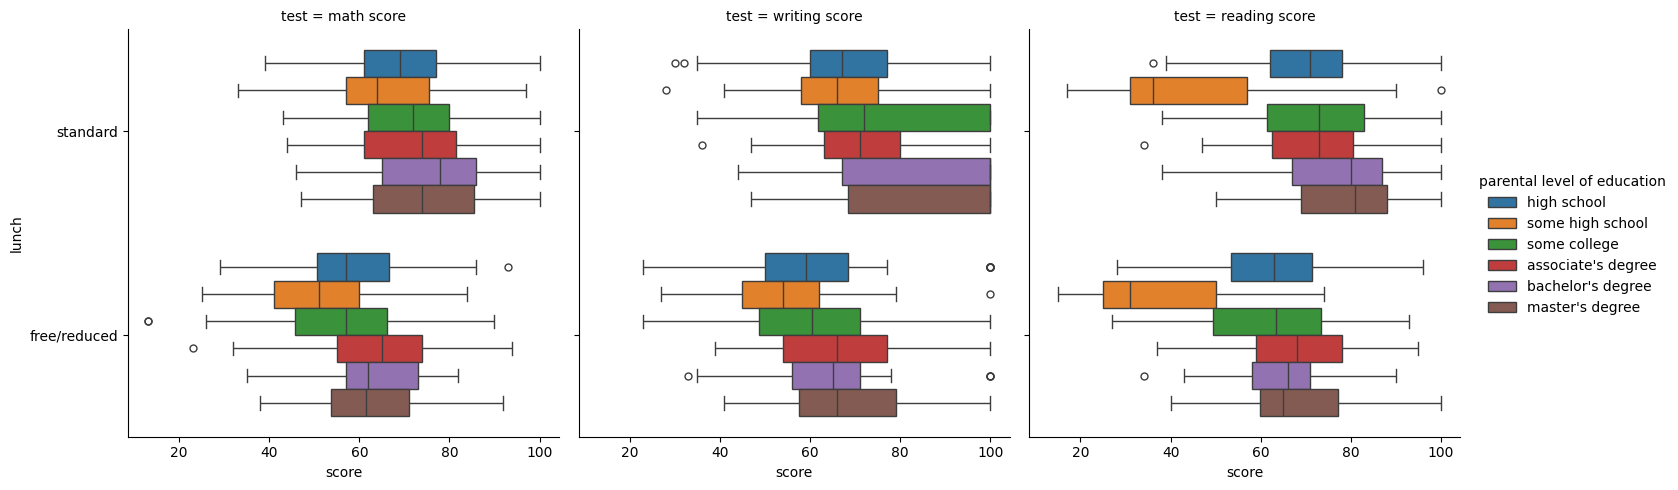

In [66]:
grafico_long_bi(df,'lunch','parental level of education')

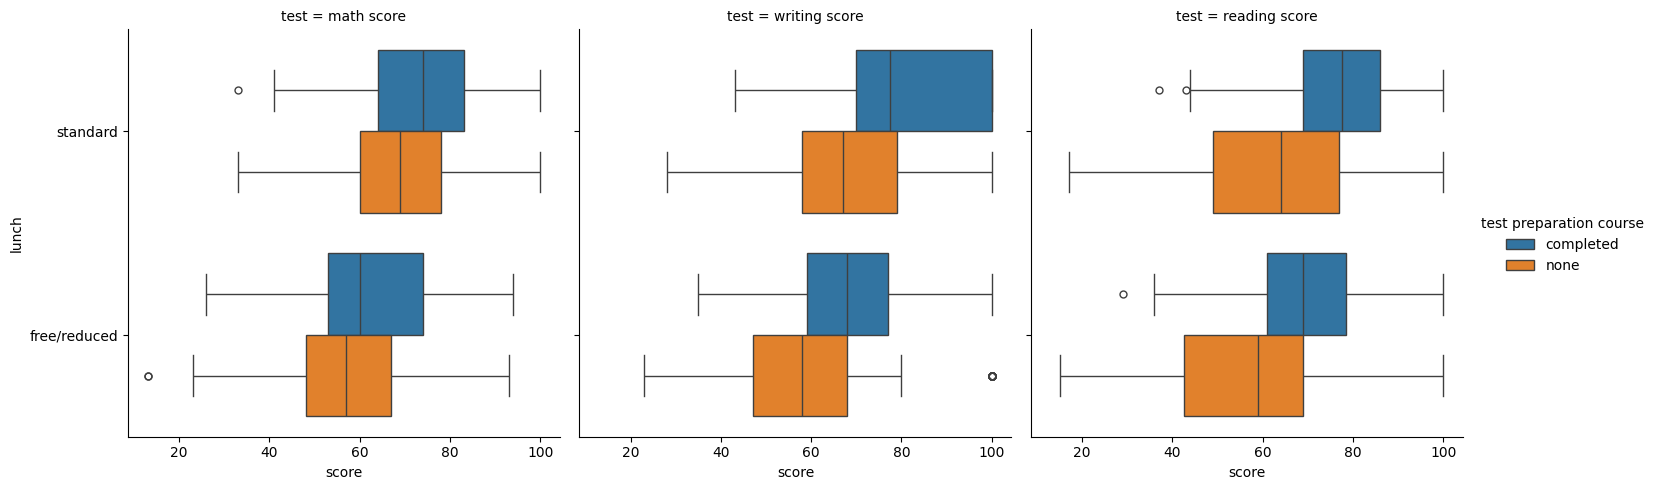

In [67]:
grafico_long_bi(df,'lunch','test preparation course')

### 2-variable Analysis with gender column 

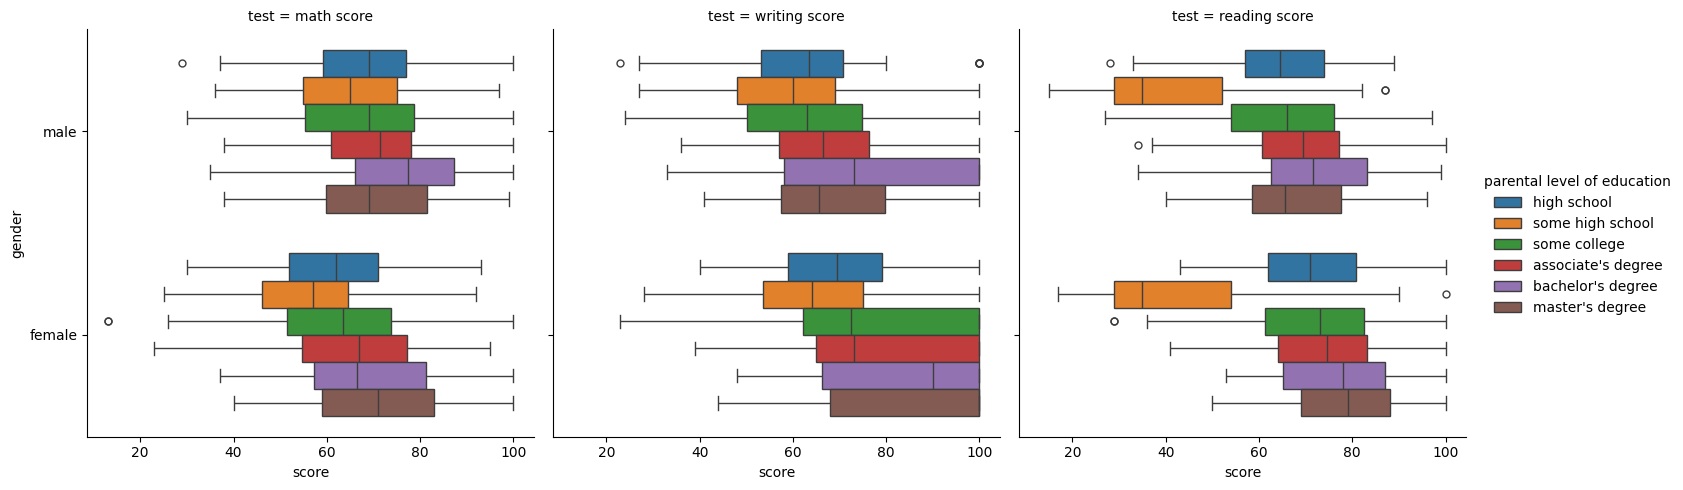

In [68]:
grafico_long_bi(df,'gender','parental level of education')

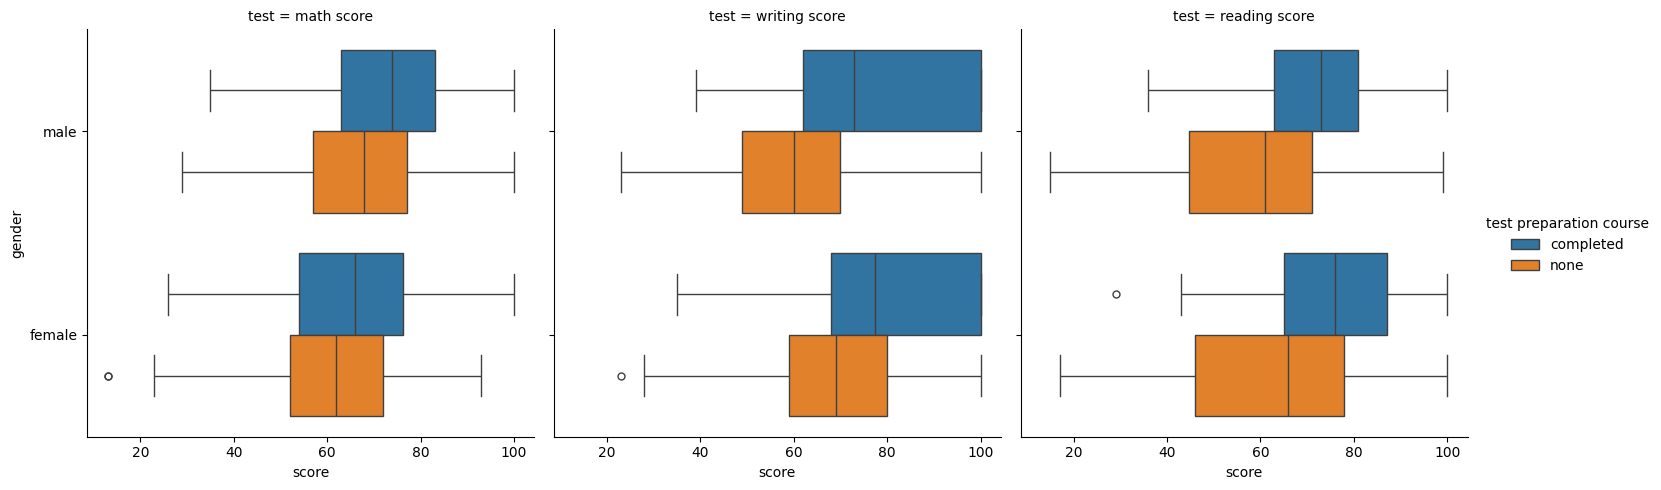

In [69]:
grafico_long_bi(df,'gender','test preparation course')

### 2-variable Analysis with Test preparation course column 

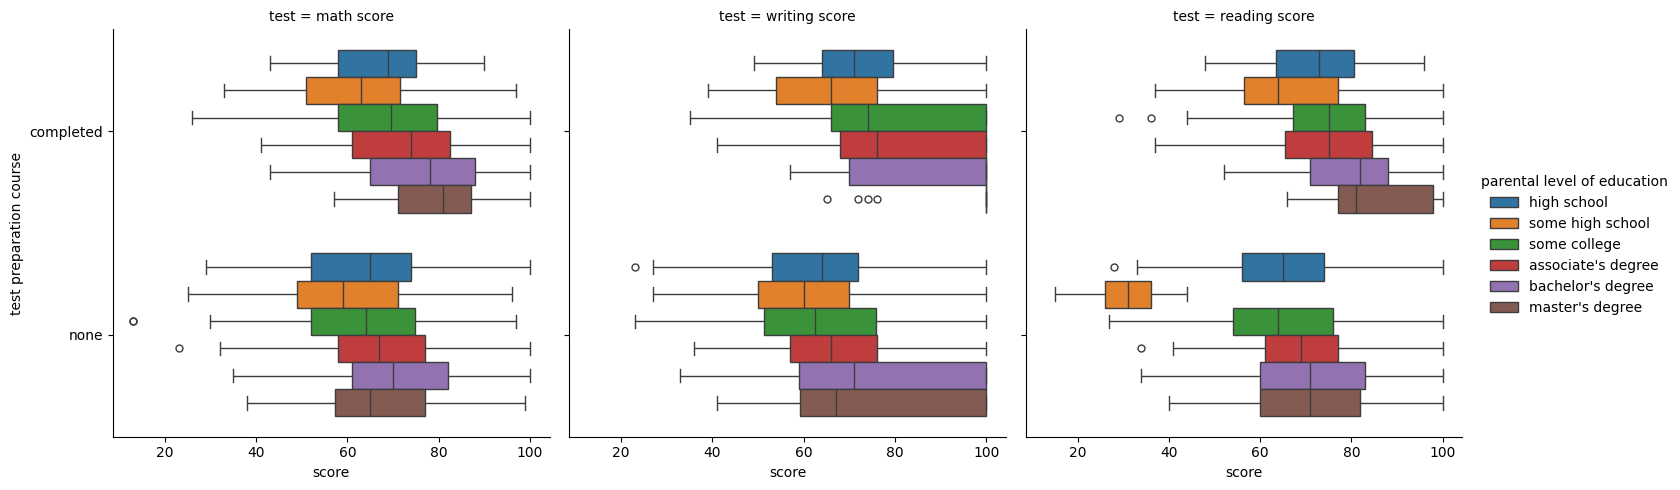

In [71]:
grafico_long_bi(df,'test preparation course','parental level of education')

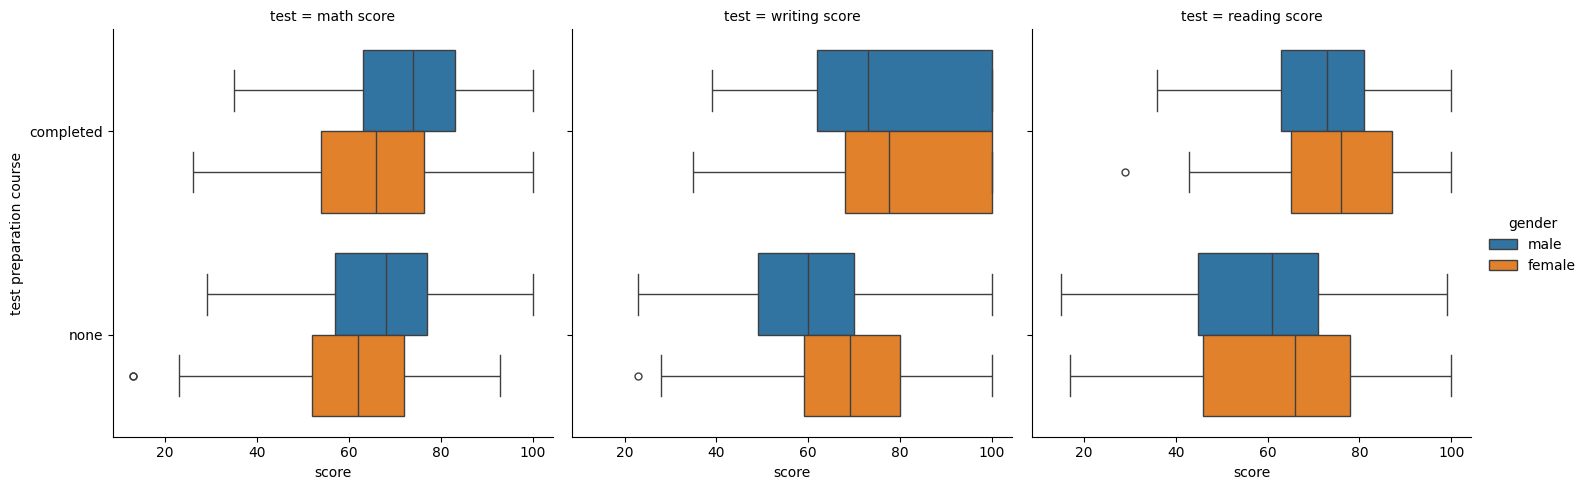

In [72]:
grafico_long_bi(df,'test preparation course','gender')

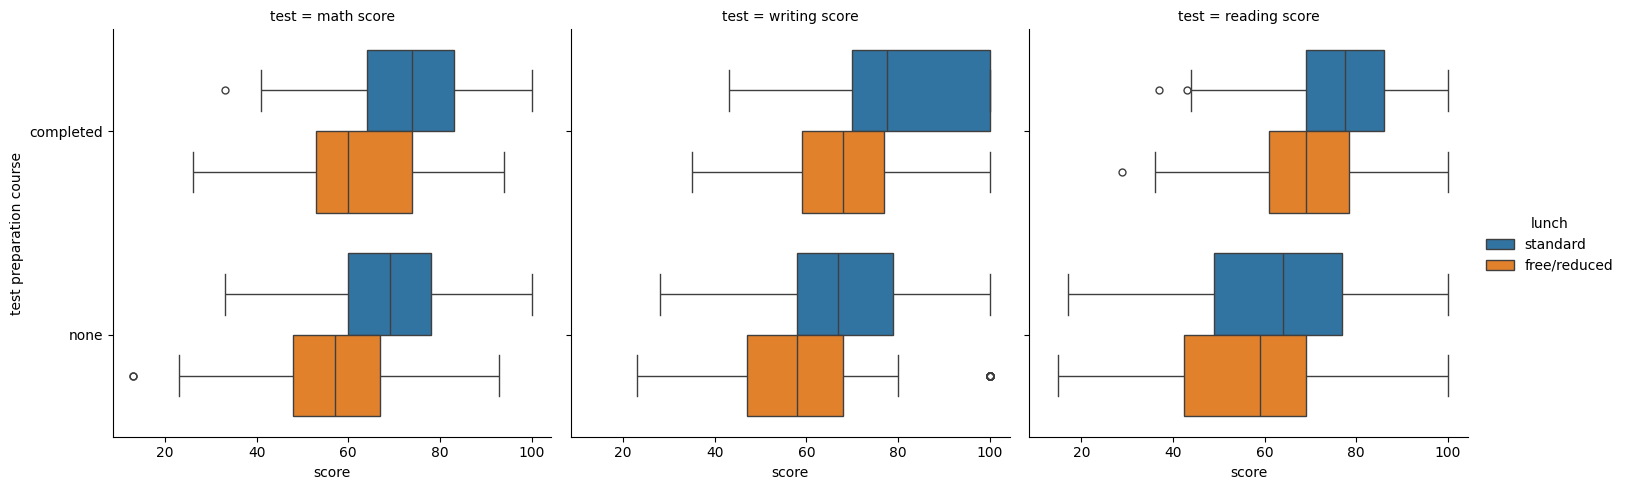

In [73]:
grafico_long_bi(df,'test preparation course','lunch')

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client

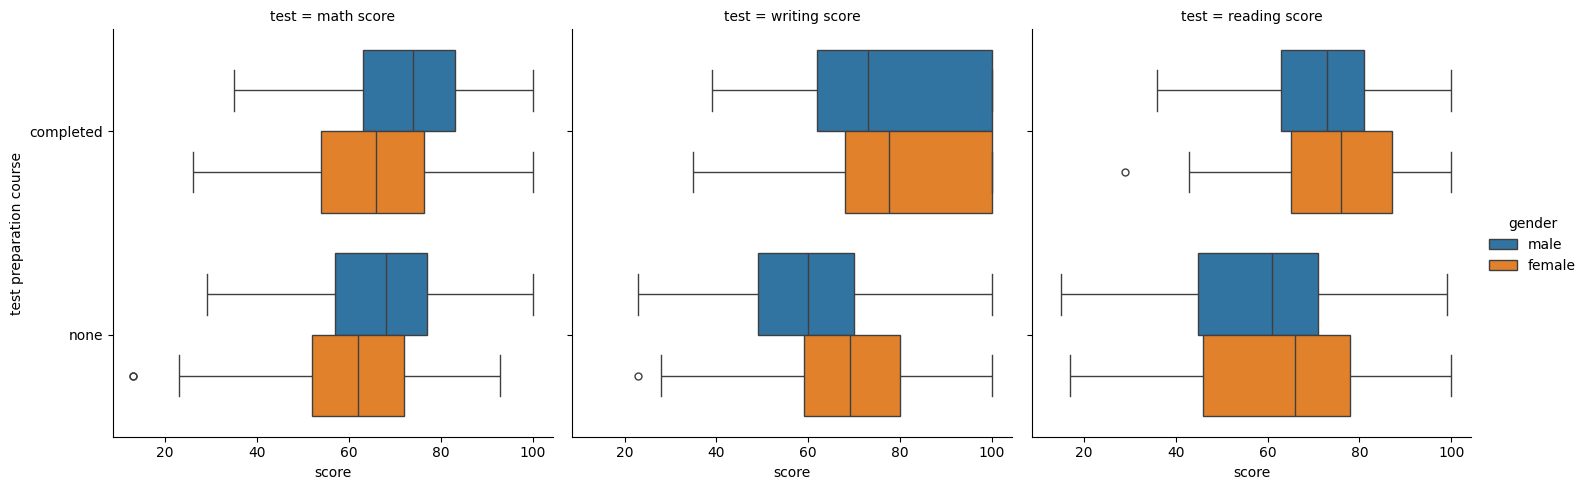

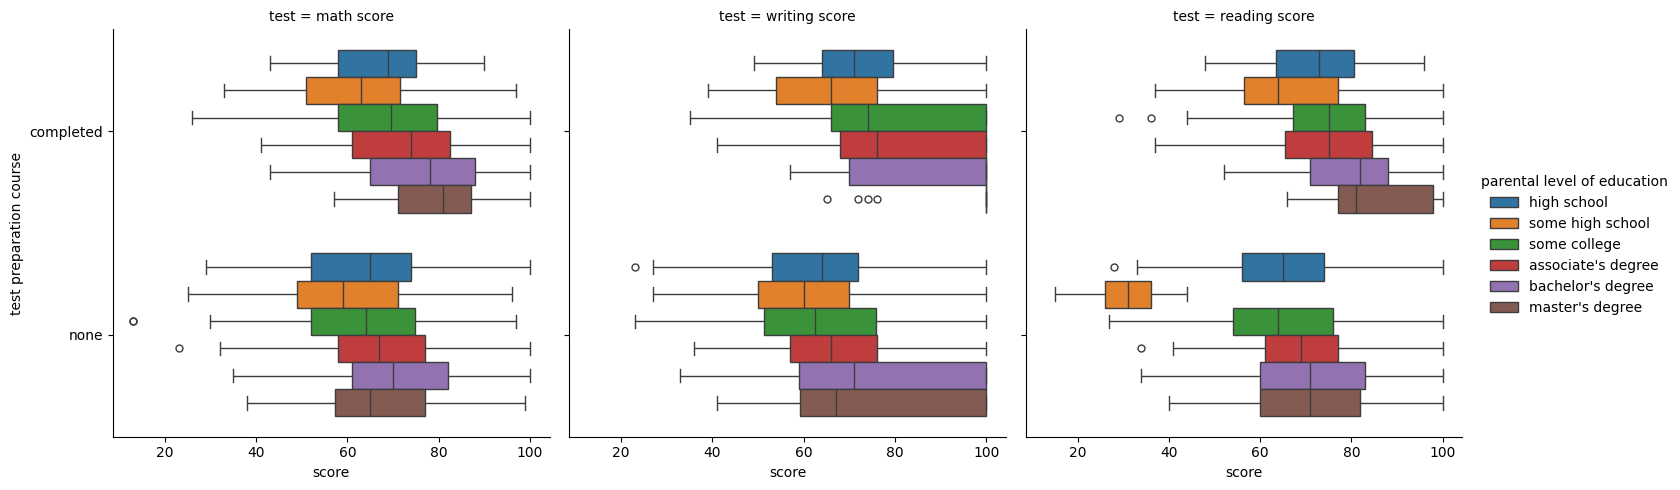

In [75]:
#Donde hay una diferencia sustancial es en el writing socre entre aquellos que han realizado el test preparation course con los que no. 
grafico_long_bi(df,'test preparation course','gender')
#Y también diria que hay una desviación el el reading socore con aquellos padres que estan catalogodas como 'some high school` en el 'level of education'
grafico_long_bi(df,'test preparation course','parental level of education')